<a href="https://colab.research.google.com/github/codonSp/Test/blob/master/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#upload data to google drive
from google.colab import files
uploaded = files.upload()

In [49]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


In [0]:
from sklearn.model_selection import cross_validate

In [0]:
# from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [0]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [123]:
#df = pd.read_csv('../input/mytest.csv')
df = pd.read_csv('https://raw.githubusercontent.com/codonSp/Test/master/bigml_59c28831336c6604c800002a.csv')

print (df2.shape)

NameError: ignored

In [13]:
print(df.shape)

(3333, 21)


In [130]:
df.iloc[:10,20:]

,churn,first,second,second1
0,False,382,4657,4
1,False,371,7191,3
2,False,358,1921,3
3,False,375,9999,1
4,False,330,6626,2
5,False,391,8027,4
6,False,355,9993,2
7,False,329,9001,3
8,False,335,4719,4
9,False,330,8173,4


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


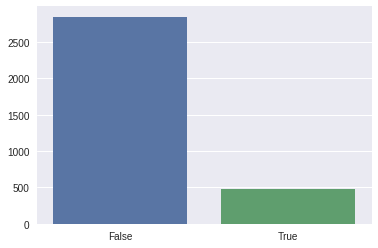

In [20]:
t = df['churn'].value_counts()
sns.barplot(t.index, t.values)

EDA

In [138]:
df.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,first,second1
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,...,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,374.074407,3.432943
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,...,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,27.467320,0.612559
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,327.000000,1.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,...,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,350.000000,3.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,...,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,374.000000,3.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,...,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,398.000000,4.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,...,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,422.000000,4.000000


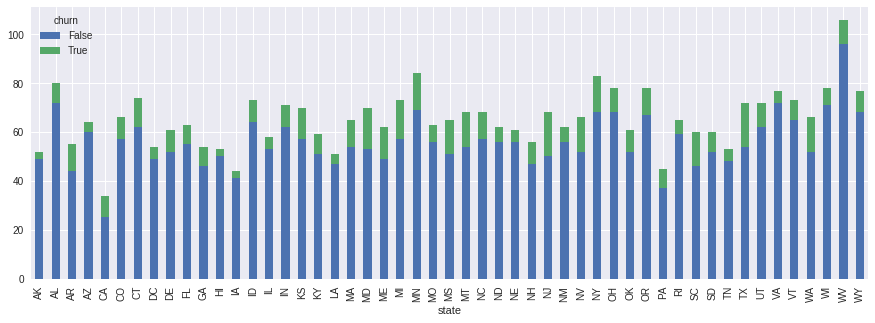

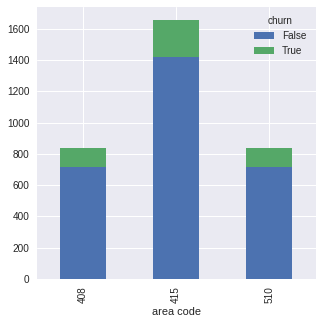

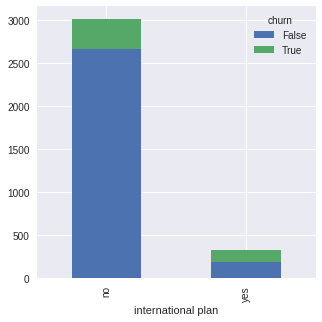

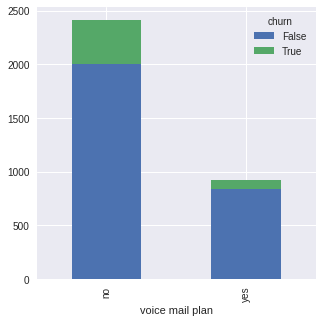

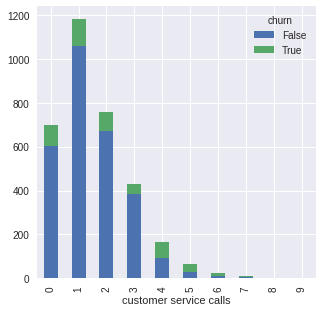

In [26]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5))
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

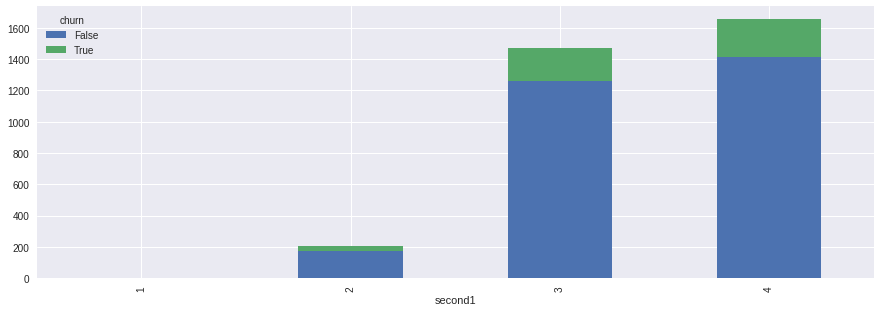

In [132]:
df.groupby(["second1", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5))

label encodes

In [0]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])



In [0]:

#one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
dfDummies = pd.get_dummies(df['area code'], prefix = 'area')

Phone number


In [0]:
df[['first','second']] = df['phone number'].str.split("-", n = 1, expand = True).astype(int)



In [0]:

df['second1'] = df['second'].apply(lambda x: len(set(str(x))))

In [90]:
len(set(str(122226)))

TypeError: ignored

In [0]:
df1 = pd.concat([df, dfDummies], axis=1).drop(['area code'],axis=1)

In [104]:
df1.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
0                           96
1                         3333
dtype: int64

In [110]:
df1.iloc[:5,20:]

,churn,0,1
0,False,382,4657
1,False,371,7191
2,False,358,1921
3,False,375,9999
4,False,330,6626


In [136]:
y = df['churn'].as_matrix().astype(np.int)
y.size

KeyError: ignored

In [55]:
from sklearn.model_selection import StratifiedKFold
stratified_k_fold = StratifiedKFold(n_splits=10, shuffle=True)
stratified_k_fold.get_n_splits(X, y)

10

In [0]:
from sklearn.model_selection import StratifiedKFold
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=5, **kwargs):
    skf = StratifiedKFold(n_splits=2)
    stratified_k_fold = StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred


In [172]:
import warnings
warnings.filterwarnings("ignore")
print('Gradient Boosting :  {:.4f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Random Forest :      {:.4f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))


Gradient Boosting :  0.9529
Random Forest :      0.9388


In [173]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [171]:
X[0]

array([-0.6786493 ,  0.67648946, -0.52360328, -0.32758048,  1.6170861 ,
        1.23488274,  1.56676695,  0.47664315,  1.56703625, -0.07060962,
       -0.05594035, -0.07042665,  0.86674322, -0.46549436,  0.86602851,
       -0.08500823, -0.60119509, -0.0856905 , -0.42793202,  0.92585609])

In [166]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'second1'],
      dtype='object')

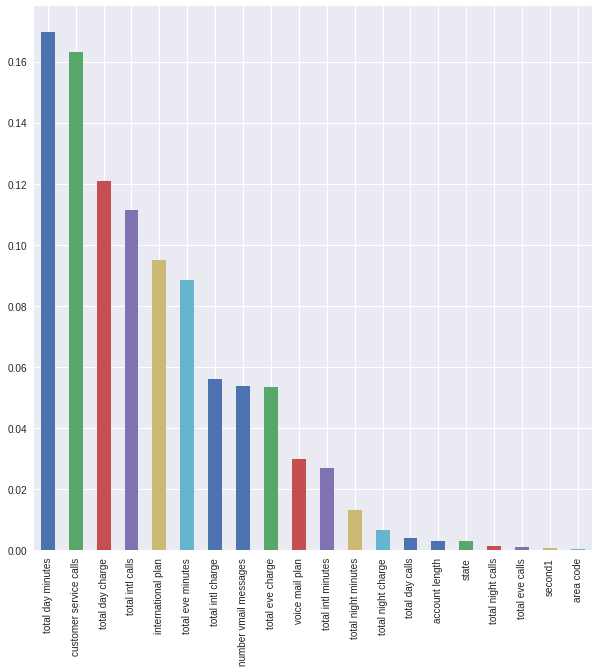

In [177]:
feature_importance = gbc.feature_importances_
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(21)
feat_importances.plot(kind='bar' , figsize=(10,10)) 

In [0]:
# df = df.drop(["Id","Churn"], axis = 1, inplace=True)
df.drop(["phone number","second","churn"], axis = 1, inplace=True)

In [0]:
X = df.as_matrix().astype(np.float)

In [0]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [0]:
max_coordinate_value(the_dict,0)

5

In [0]:
code = encode_message("Hello, World!", 12345)
decode_message(code, 12345)

Character , not encoded, set to 99999
Character ! not encoded, set to 99999


'HELLO@ WORLD@'

In [0]:
for a in 'dsd':
  print(a)

d
s
d


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import itertools  

In [0]:
!pip install -q fuzzywuzzy
!pip install StringDist

  Stored in directory: /root/.cache/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built StringDist


In [0]:
# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz

# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [0]:
import stringdist

In [0]:
df = pd.read_csv('train.csv')

In [0]:
df1 = pd.read_csv('test.csv')

ParserError: ignored

In [0]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


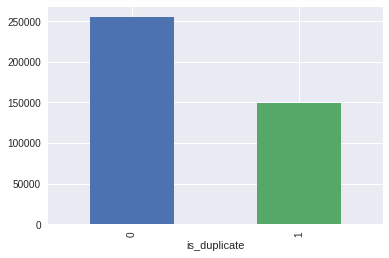

In [0]:


df.dropna(axis=0, inplace=True)
df.groupby("is_duplicate")['id'].count().plot.bar()


In [0]:
# df.drop(['id', 'qid1', 'qid2'], axis=1, inplace=True)
df.drop(['ration'], axis=1, inplace=True)

In [0]:
corpus = [
      'This is the first document.',
      'This document is the second document.',
      'And this is the third one.',
      'Is this the first document?',
  ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [0]:
X.toarray()

AttributeError: ignored

In [0]:
def st(s):
  return s.strip()
df['len1'] = df['question1'].apply(len)

In [0]:
df['len2'] = df['question2'].apply(len)

In [0]:
def f_ratio(x):
  return fuzz.ratio(x['question1'],x['question2'])
def f_partial_ratio(x):
  return fuzz.partial_ratio(x['question1'],x['question2'])
def f_token_sort_ratio(x):
  return fuzz.token_sort_ratio(x['question1'],x['question2'])
def ldist(x):
  return stringdist.levenshtein(x['question1'],x['question2'])
def countv(x):
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(x[0])
  return X.toarray()

#df['ratio'] = df.apply(f_ratio, axis=1)

In [0]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['question1'])
df['count_v1'] = list(X)

In [0]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['question2'])
df['count_v2'] = list(X)

In [0]:
df['ldist'] = df.apply(ldist, axis=1)
df['ratio'] = df.apply(f_partial_ratio, axis=1)
df['token_sort_ratio'] = df.apply(f_token_sort_ratio, axis=1)
df['count_v1'] = df['question1'].apply(countv, axis=1)
df['count_v2'] = df['question2'].apply(countv, axis=1)

TypeError: ignored

In [0]:
df.head(100)

,question1,question2,is_duplicate,t1,t2,ratio,ldist,token_sort_ratio,count_v1,count_v2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,98,9,93,"(0, 30560)\t1\n (0, 37608)\t1\n (0, 54542)...","(0, 34835)\t1\n (0, 50364)\t1\n (0, 28272)..."
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,73,43,63,"(0, 18290)\t1\n (0, 42229)\t1\n (0, 34200)...","(0, 7051)\t1\n (0, 17079)\t1\n (0, 39028)\..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,41,40,63,"(0, 64928)\t1\n (0, 63630)\t1\n (0, 65806)...","(0, 17913)\t1\n (0, 56019)\t1\n (0, 25386)..."
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,20,54,24,"(0, 32061)\t1\n (0, 56273)\t1\n (0, 36191)...","(0, 17823)\t1\n (0, 1119)\t2\n (0, 1092)\t..."
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,54,53,47,"(0, 44169)\t1\n (0, 18243)\t1\n (0, 11552)...","(0, 60326)\t1\n (0, 48790)\t1\n (0, 54269)..."
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,86,90,67,45,74,"(0, 38158)\t1\n (0, 3109)\t1\n (0, 53273)\...","(0, 35356)\t1\n (0, 3077)\t1\n (0, 49195)\..."
6,Should I buy tiago?,What keeps childern active and far from phone ...,0,19,62,32,53,23,"(0, 60683)\t1\n (0, 10944)\t1\n (0, 54939)\t1","(0, 23527)\t1\n (0, 59515)\t1\n (0, 42449)..."
7,How can I be a good geologist?,What should I do to be a great geologist?,1,30,41,67,20,61,"(0, 25580)\t1\n (0, 26217)\t1\n (0, 8188)\...","(0, 23921)\t1\n (0, 24814)\t1\n (0, 17916)..."
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,31,37,90,8,87,"(0, 31172)\t1\n (0, 63602)\t1\n (0, 67083)...","(0, 39739)\t1\n (0, 29024)\t1\n (0, 58782)..."
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,60,49,57,49,44,"(0, 17002)\t1\n (0, 40179)\t1\n (0, 12575)...","(0, 22918)\t1\n (0, 22571)\t1\n (0, 15899)..."


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 3 columns):
question1       404287 non-null object
question2       404287 non-null object
is_duplicate    404287 non-null int64
dtypes: int64(1), object(2)
memory usage: 32.3+ MB


In [0]:
a = 0 
for i in range(a,a+10):
    print(df.question1[i])
    print(df.question2[i])
    print(df.is_duplicate[i])
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
0

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
0

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?
0

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?
0

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?
0

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
1

Should I buy tiago?
What keeps childern active and far from phone and video games?
0

How can I be a good geologist?
What should I do to be a great geologist?
1

When do 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop(columns=['question1','question2','is_duplicate','count_v1','count_v2'])
y = df['is_duplicate']
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [0]:
X_train.head()

,t1,t2,ratio,ldist,token_sort_ratio,count_v2
186150,103,47,45,77,33,"(0, 29610)\t1\n (0, 19884)\t1\n (0, 59735)..."
208652,95,95,99,1,99,"(0, 15049)\t1\n (0, 46270)\t1\n (0, 1681)\..."
268163,150,35,49,127,22,"(0, 7583)\t1\n (0, 60990)\t1\n (0, 39739)\..."
155539,51,109,45,71,54,"(0, 51002)\t1\n (0, 56128)\t1\n (0, 56757)..."
212779,28,26,88,3,88,"(0, 55069)\t1\n (0, 10839)\t1\n (0, 46114)..."


In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [0]:
pred = clf.predict(X_valid)

In [0]:
pred

array([1, 0, 0, ..., 0, 1, 0])

Confusion matrix, without normalization
[[49165 12708]
 [35102 36440]]
Normalized confusion matrix
[[0.79 0.21]
 [0.49 0.51]]


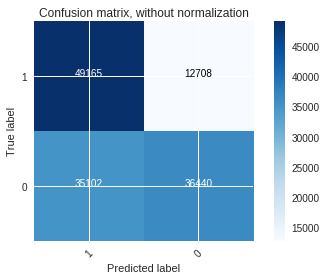

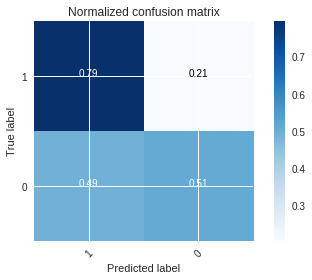

In [0]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = [1,0]
# Compute confusion matrix
cnf_matrix = confusion_matrix(pred,y_valid.values)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,y_valid.values)

array([[49165, 12708],
       [35102, 36440]])